In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('./datasets/dataset.csv')
df1 = pd.read_csv('./datasets/Symptom-severity.csv')
df2 = pd.read_csv('./datasets/symptom_Description.csv')
df3 = pd.read_csv('./datasets/symptom_precaution.csv')

In [3]:
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


### Show all diseases

In [5]:
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [6]:
len(df['Disease'].unique())

41

### Reshaping DataFrame

In [7]:
# get a list like this --> ['Symptom_1', Symptom_2, ..., Symptom_17 ]
cols = [i for i in df.iloc[:,1:].columns]
cols

['Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

In [8]:
# Turns all columns in 'cols' to variable column.
# The number of rows of tmp DataFrame is 17x from the original DataFrame

tmp = pd.melt(df.reset_index() ,id_vars = ['index'], value_vars = cols )
tmp['add1'] = 1
tmp.head()

,index,variable,value,add1
0,0,Symptom_1,itching,1
1,1,Symptom_1,skin_rash,1
2,2,Symptom_1,itching,1
3,3,Symptom_1,itching,1
4,4,Symptom_1,itching,1


In [9]:
# Pivot table
diseases = pd.pivot_table(tmp, 
                          values = 'add1',
                          index = 'index',
                          columns = 'value')

# Add labels column
diseases.insert(0,'label',df['Disease'])

# Fill NaN with zero
diseases = diseases.fillna(0)
diseases.head()

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
diseases.shape

(4920, 132)

In [11]:
len(diseases['label'].unique())

41

In [38]:
dic_symptoms = {}
list_symptoms = []
for i in range(1,len(diseases.columns)):
    dic_symptoms[diseases.columns[i]] = i-1
    list_symptoms.append(diseases.columns[i])
    
dic_symptoms

{' abdominal_pain': 0,
 ' abnormal_menstruation': 1,
 ' acidity': 2,
 ' acute_liver_failure': 3,
 ' altered_sensorium': 4,
 ' anxiety': 5,
 ' back_pain': 6,
 ' belly_pain': 7,
 ' blackheads': 8,
 ' bladder_discomfort': 9,
 ' blister': 10,
 ' blood_in_sputum': 11,
 ' bloody_stool': 12,
 ' blurred_and_distorted_vision': 13,
 ' breathlessness': 14,
 ' brittle_nails': 15,
 ' bruising': 16,
 ' burning_micturition': 17,
 ' chest_pain': 18,
 ' chills': 19,
 ' cold_hands_and_feets': 20,
 ' coma': 21,
 ' congestion': 22,
 ' constipation': 23,
 ' continuous_feel_of_urine': 24,
 ' continuous_sneezing': 25,
 ' cough': 26,
 ' cramps': 27,
 ' dark_urine': 28,
 ' dehydration': 29,
 ' depression': 30,
 ' diarrhoea': 31,
 ' dischromic _patches': 32,
 ' distention_of_abdomen': 33,
 ' dizziness': 34,
 ' drying_and_tingling_lips': 35,
 ' enlarged_thyroid': 36,
 ' excessive_hunger': 37,
 ' extra_marital_contacts': 38,
 ' family_history': 39,
 ' fast_heart_rate': 40,
 ' fatigue': 41,
 ' fluid_overload': 42,

### Split train, test

In [13]:
ds_train = diseases.sample(frac = 0.7, random_state = 1)
ds_test = diseases.drop(index = ds_train.index)

x_train, y_train, x_test, y_test =  ds_train.drop('label', axis = 1),\
                                    ds_train['label'],\
                                    ds_test.drop('label', axis = 1),\
                                    ds_test['label']

In [14]:
pd.crosstab(ds_train['label'], columns = 'n')

col_0,n
label,
(vertigo) Paroymsal Positional Vertigo,86
AIDS,87
Acne,89
Alcoholic hepatitis,70
Allergy,81
Arthritis,86
Bronchial Asthma,79
Cervical spondylosis,82
Chicken pox,82


In [15]:
pd.crosstab(ds_test['label'], columns = 'n')

col_0,n
label,
(vertigo) Paroymsal Positional Vertigo,34
AIDS,33
Acne,31
Alcoholic hepatitis,50
Allergy,39
Arthritis,34
Bronchial Asthma,41
Cervical spondylosis,38
Chicken pox,38


### RandomForestClassifier with default parameter

In [16]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
result = rfc.predict(x_test)
print(classification_report(y_true=y_test.values, y_pred=result))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        34
                                   AIDS       1.00      1.00      1.00        33
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        50
                                Allergy       1.00      1.00      1.00        39
                              Arthritis       1.00      1.00      1.00        34
                       Bronchial Asthma       1.00      1.00      1.00        41
                   Cervical spondylosis       1.00      1.00      1.00        38
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        33
                            Common Cold       1.00      1.00      1.00        30
                           

Text(69.0, 0.5, 'Predicted Value')

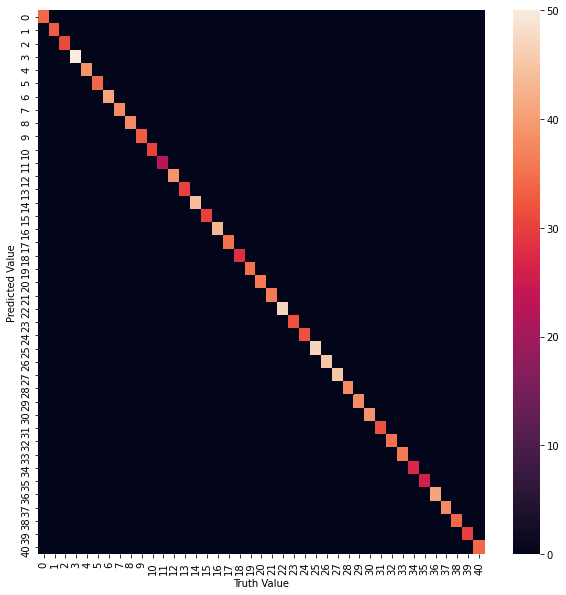

In [45]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(confusion_matrix(y_true = y_test.values, y_pred = result))
plt.xlabel("Truth Value")
plt.ylabel("Predicted Value")

Text(204.0, 0.5, 'Predicated Value')

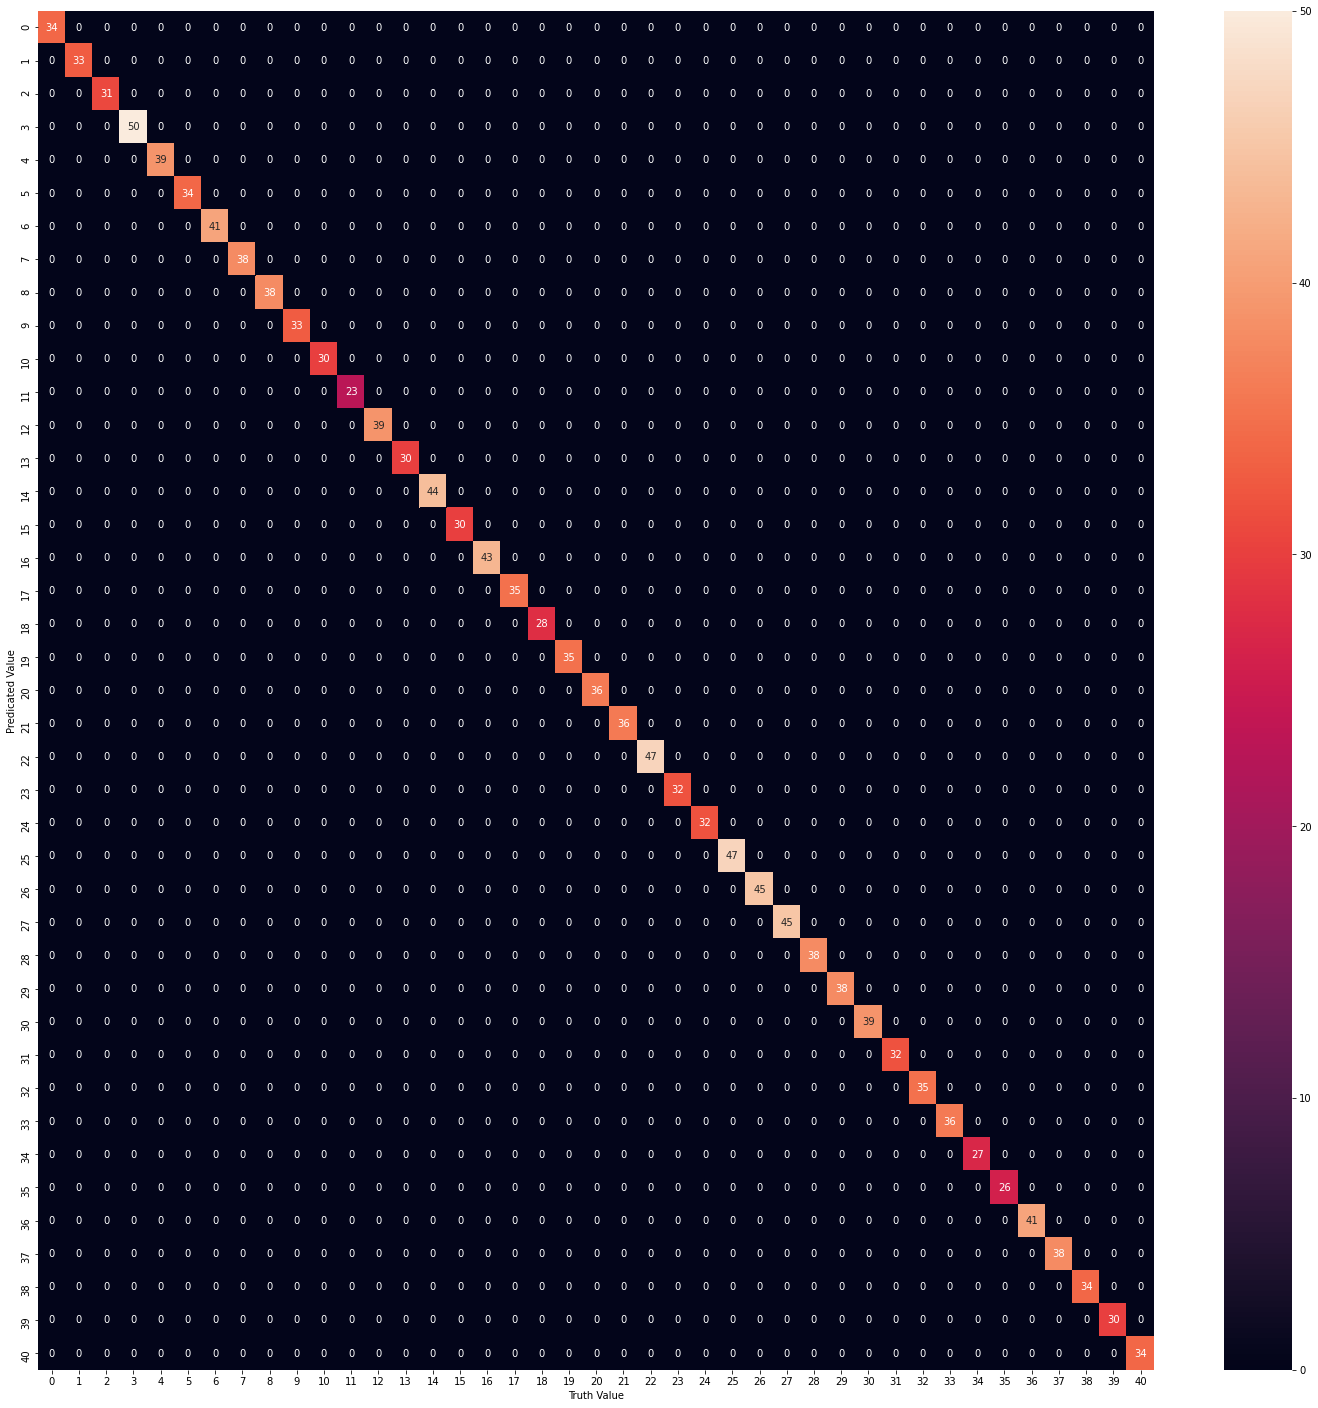

In [48]:
fig, ax = plt.subplots(figsize = (25,25))
sns.heatmap(confusion_matrix(y_true = y_test.values, y_pred = result),  annot =True)
plt.xlabel("Truth Value")
plt.ylabel("Predicated Value")

In [18]:
#Input: It takes in a 1D array of 132 binary values for every symptom
rfc.predict(x_test.iloc[1:2])
x_test.iloc[1:2]
#Sample Input: Dataframe of 1 rows × 131 columns
#Sample Output: ['Fungal infection']

value,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
print("Number of symptoms used to identify the disease ",diseases.shape[1])
print("Number of diseases that can be identified ",len(df['Disease'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


In [20]:
diseases.iloc[:,1:]

value,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
a = diseases[diseases.label == 'Common Cold']

c = a.columns[(a == 1).all()]


In [22]:
c

Index([' chest_pain', ' congestion', ' loss_of_smell', ' muscle_pain',
       ' phlegm', ' redness_of_eyes', ' runny_nose', ' sinus_pressure',
       ' throat_irritation'],
      dtype='object', name='value')

In [23]:
list = np.array(x_test.iloc[2,:])
list

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
"""import pickle
import json
file_name = "drug_symptom_model.pickle"
with open(file_name,'wb') as f:
    pickle.dump(rfc,f)

columns={
    'data_columns' : [col.lower() for col in diseases.iloc[:,1:].columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))
"""

'import pickle\nimport json\nfile_name = "drug_symptom_model.pickle"\nwith open(file_name,\'wb\') as f:\n    pickle.dump(rfc,f)\n\ncolumns={\n    \'data_columns\' : [col.lower() for col in diseases.iloc[:,1:].columns]\n}\nwith open("columns.json","w") as f:\n    f.write(json.dumps(columns))\n'

In [25]:
X_train = x_train.to_numpy()
Y_train = y_train.to_numpy()
X_test1 = x_test.to_numpy()
Y_test = y_test.to_numpy() 

In [26]:
dic={}
y_terain = []
am=0

for i in range(len(Y_train)):
    if Y_train[i] not in dic.values():
        dic[am] = Y_train[i]
        am+=1




In [27]:
dic

{0: 'Urinary tract infection',
 1: 'Gastroenteritis',
 2: 'Hypothyroidism',
 3: 'Chicken pox',
 4: 'Cervical spondylosis',
 5: 'Migraine',
 6: 'Hepatitis B',
 7: 'Diabetes ',
 8: 'Hepatitis E',
 9: 'Bronchial Asthma',
 10: 'Hyperthyroidism',
 11: '(vertigo) Paroymsal  Positional Vertigo',
 12: 'Varicose veins',
 13: 'Dengue',
 14: 'Chronic cholestasis',
 15: 'Paralysis (brain hemorrhage)',
 16: 'Tuberculosis',
 17: 'Hepatitis C',
 18: 'Allergy',
 19: 'Alcoholic hepatitis',
 20: 'Typhoid',
 21: 'Hypertension ',
 22: 'Malaria',
 23: 'Jaundice',
 24: 'Dimorphic hemmorhoids(piles)',
 25: 'Hepatitis D',
 26: 'Heart attack',
 27: 'Osteoarthristis',
 28: 'Drug Reaction',
 29: 'AIDS',
 30: 'Hypoglycemia',
 31: 'Impetigo',
 32: 'GERD',
 33: 'Psoriasis',
 34: 'Pneumonia',
 35: 'hepatitis A',
 36: 'Acne',
 37: 'Peptic ulcer diseae',
 38: 'Arthritis',
 39: 'Common Cold',
 40: 'Fungal infection'}

In [28]:
for i in Y_train:
    
    for key,value in dic.items():
        if value == i :
            y_terain.append(key)

In [29]:
y_terain = np.array(y_terain)

In [30]:
y_terain

array([ 0,  1,  2, ...,  9, 17, 11])

In [31]:
y_terain.shape

(3444,)

In [32]:
y_test1 = []
for i in Y_test:
    
    for key,value in dic.items():
        if value == i :
            y_test1.append(key)

In [33]:
y_test1 = np.array(y_test1)
y_test1

array([40, 40, 18, ..., 10, 38, 11])

In [34]:
y_test1.shape

(1476,)

In [35]:
X_train.shape

(3444, 131)

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
model = keras.Sequential([
    keras.layers.Dense(41, input_shape=(131,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_terain, epochs=5000)

Epoch 1/5000
108/108 [==============================] - 2s 2ms/step - loss: 3.2387 - accuracy: 0.9512
Epoch 2/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.3950 - accuracy: 0.9985
Epoch 3/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.7556 - accuracy: 1.0000
Epoch 4/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.2979 - accuracy: 1.0000
Epoch 5/5000
108/108 [==============================] - 0s 2ms/step - loss: 0.9702 - accuracy: 1.0000
Epoch 6/5000
108/108 [==============================] - 0s 2ms/step - loss: 0.7340 - accuracy: 1.0000
Epoch 7/5000
108/108 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 1.0000
Epoch 8/5000
108/108 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 1.0000
Epoch 9/5000
108/108 [==============================] - 0s 2ms/step - loss: 0.3506 - accuracy: 1.0000
Epoch 10/5000
108/108 [==============================] - 0s 2ms/step - loss: 0.284

108/108 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 81/5000
108/108 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 82/5000
108/108 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 83/5000
108/108 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 84/5000
108/108 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 85/5000
108/108 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 86/5000
108/108 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 87/5000
108/108 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 88/5000
108/108 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 89/5000
108/108 [==============================] - 0s 2ms/step - loss: 0.0010 - a

108/108 [==============================] - 0s 2ms/step - loss: 5.0041e-05 - accuracy: 1.0000
Epoch 157/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.7946e-05 - accuracy: 1.0000
Epoch 158/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.5937e-05 - accuracy: 1.0000
Epoch 159/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.4074e-05 - accuracy: 1.0000
Epoch 160/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.2330e-05 - accuracy: 1.0000
Epoch 161/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.0708e-05 - accuracy: 1.0000
Epoch 162/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.9049e-05 - accuracy: 1.0000
Epoch 163/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.7421e-05 - accuracy: 1.0000
Epoch 164/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.5920e-05 - accuracy: 1.0000
Epoch 165/5000
108/108 [===================

Epoch 232/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.0261e-06 - accuracy: 1.0000
Epoch 233/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.9367e-06 - accuracy: 1.0000
Epoch 234/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.8473e-06 - accuracy: 1.0000
Epoch 235/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.7628e-06 - accuracy: 1.0000
Epoch 236/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.6675e-06 - accuracy: 1.0000
Epoch 237/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.5996e-06 - accuracy: 1.0000
Epoch 238/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.5186e-06 - accuracy: 1.0000
Epoch 239/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.4429e-06 - accuracy: 1.0000
Epoch 240/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.3659e-06 - accuracy: 1.0000
Epoch 241/5000
108/108 [====

108/108 [==============================] - 0s 2ms/step - loss: 4.7209e-07 - accuracy: 1.0000
Epoch 308/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.6077e-07 - accuracy: 1.0000
Epoch 309/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.5250e-07 - accuracy: 1.0000
Epoch 310/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.4170e-07 - accuracy: 1.0000
Epoch 311/5000
108/108 [==============================] - 0s 3ms/step - loss: 4.3561e-07 - accuracy: 1.0000
Epoch 312/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.2671e-07 - accuracy: 1.0000
Epoch 313/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.2194e-07 - accuracy: 1.0000
Epoch 314/5000
108/108 [==============================] - 0s 3ms/step - loss: 4.1235e-07 - accuracy: 1.0000
Epoch 315/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.0556e-07 - accuracy: 1.0000
Epoch 316/5000
108/108 [===================

108/108 [==============================] - 0s 2ms/step - loss: 1.7224e-07 - accuracy: 1.0000
Epoch 383/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.7161e-07 - accuracy: 1.0000
Epoch 384/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.6881e-07 - accuracy: 1.0000
Epoch 385/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.6756e-07 - accuracy: 1.0000
Epoch 386/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.6566e-07 - accuracy: 1.0000
Epoch 387/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.6410e-07 - accuracy: 1.0000
Epoch 388/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.6216e-07 - accuracy: 1.0000
Epoch 389/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.6040e-07 - accuracy: 1.0000
Epoch 390/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.5922e-07 - accuracy: 1.0000
Epoch 391/5000
108/108 [===================

Epoch 458/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.7333e-08 - accuracy: 1.0000
Epoch 459/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.6676e-08 - accuracy: 1.0000
Epoch 460/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.6053e-08 - accuracy: 1.0000
Epoch 461/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.6295e-08 - accuracy: 1.0000
Epoch 462/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.5257e-08 - accuracy: 1.0000
Epoch 463/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.4599e-08 - accuracy: 1.0000
Epoch 464/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.4149e-08 - accuracy: 1.0000
Epoch 465/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.3214e-08 - accuracy: 1.0000
Epoch 466/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.2591e-08 - accuracy: 1.0000
Epoch 467/5000
108/108 [====

108/108 [==============================] - 0s 2ms/step - loss: 6.5420e-08 - accuracy: 1.0000
Epoch 534/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.5593e-08 - accuracy: 1.0000
Epoch 535/5000
108/108 [==============================] - 0s 1ms/step - loss: 6.5350e-08 - accuracy: 1.0000
Epoch 536/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.5316e-08 - accuracy: 1.0000
Epoch 537/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.4762e-08 - accuracy: 1.0000
Epoch 538/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.4554e-08 - accuracy: 1.0000
Epoch 539/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.4208e-08 - accuracy: 1.0000
Epoch 540/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.4035e-08 - accuracy: 1.0000
Epoch 541/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.3931e-08 - accuracy: 1.0000
Epoch 542/5000
108/108 [===================

Epoch 609/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.8009e-08 - accuracy: 1.0000
Epoch 610/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.7628e-08 - accuracy: 1.0000
Epoch 611/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.7213e-08 - accuracy: 1.0000
Epoch 612/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.7628e-08 - accuracy: 1.0000
Epoch 613/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.7248e-08 - accuracy: 1.0000
Epoch 614/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.6936e-08 - accuracy: 1.0000
Epoch 615/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.6901e-08 - accuracy: 1.0000
Epoch 616/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.6659e-08 - accuracy: 1.0000
Epoch 617/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.6486e-08 - accuracy: 1.0000
Epoch 618/5000
108/108 [====

108/108 [==============================] - 0s 2ms/step - loss: 3.9113e-08 - accuracy: 1.0000
Epoch 685/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.8836e-08 - accuracy: 1.0000
Epoch 686/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.8663e-08 - accuracy: 1.0000
Epoch 687/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.8525e-08 - accuracy: 1.0000
Epoch 688/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.8421e-08 - accuracy: 1.0000
Epoch 689/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.8352e-08 - accuracy: 1.0000
Epoch 690/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.8040e-08 - accuracy: 1.0000
Epoch 691/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.7867e-08 - accuracy: 1.0000
Epoch 692/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.7867e-08 - accuracy: 1.0000
Epoch 693/5000
108/108 [===================

Epoch 760/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.2571e-08 - accuracy: 1.0000
Epoch 761/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.2571e-08 - accuracy: 1.0000
Epoch 762/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.2294e-08 - accuracy: 1.0000
Epoch 763/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.2364e-08 - accuracy: 1.0000
Epoch 764/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.1948e-08 - accuracy: 1.0000
Epoch 765/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.2156e-08 - accuracy: 1.0000
Epoch 766/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.2121e-08 - accuracy: 1.0000
Epoch 767/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.1845e-08 - accuracy: 1.0000
Epoch 768/5000
108/108 [==============================] - 0s 2ms/step - loss: 3.1914e-08 - accuracy: 1.0000
Epoch 769/5000
108/108 [====

108/108 [==============================] - 0s 2ms/step - loss: 2.7310e-08 - accuracy: 1.0000
Epoch 836/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.7345e-08 - accuracy: 1.0000
Epoch 837/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.6964e-08 - accuracy: 1.0000
Epoch 838/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.6999e-08 - accuracy: 1.0000
Epoch 839/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.6826e-08 - accuracy: 1.0000
Epoch 840/5000
108/108 [==============================] - 0s 1ms/step - loss: 2.6791e-08 - accuracy: 1.0000
Epoch 841/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.6999e-08 - accuracy: 1.0000
Epoch 842/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.6929e-08 - accuracy: 1.0000
Epoch 843/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.6895e-08 - accuracy: 1.0000
Epoch 844/5000
108/108 [===================

Epoch 911/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.3918e-08 - accuracy: 1.0000
Epoch 912/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.3918e-08 - accuracy: 1.0000
Epoch 913/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.3987e-08 - accuracy: 1.0000
Epoch 914/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.4091e-08 - accuracy: 1.0000
Epoch 915/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.3849e-08 - accuracy: 1.0000
Epoch 916/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.3987e-08 - accuracy: 1.0000
Epoch 917/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.3918e-08 - accuracy: 1.0000
Epoch 918/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.3710e-08 - accuracy: 1.0000
Epoch 919/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.3710e-08 - accuracy: 1.0000
Epoch 920/5000
108/108 [====

108/108 [==============================] - 0s 2ms/step - loss: 2.1357e-08 - accuracy: 1.0000
Epoch 987/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.1253e-08 - accuracy: 1.0000
Epoch 988/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.1357e-08 - accuracy: 1.0000
Epoch 989/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.1287e-08 - accuracy: 1.0000
Epoch 990/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.1391e-08 - accuracy: 1.0000
Epoch 991/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.1184e-08 - accuracy: 1.0000
Epoch 992/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.1253e-08 - accuracy: 1.0000
Epoch 993/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.1080e-08 - accuracy: 1.0000
Epoch 994/5000
108/108 [==============================] - 0s 2ms/step - loss: 2.1149e-08 - accuracy: 1.0000
Epoch 995/5000
108/108 [===================

108/108 [==============================] - 0s 2ms/step - loss: 1.9107e-08 - accuracy: 1.0000
Epoch 1062/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.9107e-08 - accuracy: 1.0000
Epoch 1063/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.8691e-08 - accuracy: 1.0000
Epoch 1064/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.8518e-08 - accuracy: 1.0000
Epoch 1065/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.8726e-08 - accuracy: 1.0000
Epoch 1066/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.8622e-08 - accuracy: 1.0000
Epoch 1067/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.8899e-08 - accuracy: 1.0000
Epoch 1068/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.8726e-08 - accuracy: 1.0000
Epoch 1069/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.8345e-08 - accuracy: 1.0000
Epoch 1070/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 1.6822e-08 - accuracy: 1.0000
Epoch 1137/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.6891e-08 - accuracy: 1.0000
Epoch 1138/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.6684e-08 - accuracy: 1.0000
Epoch 1139/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.6649e-08 - accuracy: 1.0000
Epoch 1140/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.6649e-08 - accuracy: 1.0000
Epoch 1141/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.6511e-08 - accuracy: 1.0000
Epoch 1142/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.6338e-08 - accuracy: 1.0000
Epoch 1143/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.6649e-08 - accuracy: 1.0000
Epoch 1144/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.6476e-08 - accuracy: 1.0000
Epoch 1145/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 1.5161e-08 - accuracy: 1.0000
Epoch 1211/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.5022e-08 - accuracy: 1.0000
Epoch 1212/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.5022e-08 - accuracy: 1.0000
Epoch 1213/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.5092e-08 - accuracy: 1.0000
Epoch 1214/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.4849e-08 - accuracy: 1.0000
Epoch 1215/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.5265e-08 - accuracy: 1.0000
Epoch 1216/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.4711e-08 - accuracy: 1.0000
Epoch 1217/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.4607e-08 - accuracy: 1.0000
Epoch 1218/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.4884e-08 - accuracy: 1.0000
Epoch 1219/5000
108/108 [==========

Epoch 1285/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.3776e-08 - accuracy: 1.0000
Epoch 1286/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.3845e-08 - accuracy: 1.0000
Epoch 1287/5000
108/108 [==============================] - 0s 3ms/step - loss: 1.3811e-08 - accuracy: 1.0000
Epoch 1288/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.3742e-08 - accuracy: 1.0000
Epoch 1289/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.3707e-08 - accuracy: 1.0000
Epoch 1290/5000
108/108 [==============================] - 0s 3ms/step - loss: 1.3707e-08 - accuracy: 1.0000
Epoch 1291/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.3880e-08 - accuracy: 1.0000
Epoch 1292/5000
108/108 [==============================] - 0s 3ms/step - loss: 1.3638e-08 - accuracy: 1.0000
Epoch 1293/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.3776e-08 - accuracy: 1.0000
Epoch 1294/5000
108

108/108 [==============================] - 0s 2ms/step - loss: 1.2980e-08 - accuracy: 1.0000
Epoch 1361/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.3119e-08 - accuracy: 1.0000
Epoch 1362/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.2599e-08 - accuracy: 1.0000
Epoch 1363/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.3188e-08 - accuracy: 1.0000
Epoch 1364/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.2980e-08 - accuracy: 1.0000
Epoch 1365/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.3153e-08 - accuracy: 1.0000
Epoch 1366/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.2945e-08 - accuracy: 1.0000
Epoch 1367/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.2634e-08 - accuracy: 1.0000
Epoch 1368/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.2496e-08 - accuracy: 1.0000
Epoch 1369/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 1.2253e-08 - accuracy: 1.0000
Epoch 1436/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1630e-08 - accuracy: 1.0000
Epoch 1437/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.2115e-08 - accuracy: 1.0000
Epoch 1438/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1942e-08 - accuracy: 1.0000
Epoch 1439/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1942e-08 - accuracy: 1.0000
Epoch 1440/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.2115e-08 - accuracy: 1.0000
Epoch 1441/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1596e-08 - accuracy: 1.0000
Epoch 1442/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1942e-08 - accuracy: 1.0000
Epoch 1443/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1734e-08 - accuracy: 1.0000
Epoch 1444/5000
108/108 [==========

Epoch 1510/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1042e-08 - accuracy: 1.0000
Epoch 1511/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1215e-08 - accuracy: 1.0000
Epoch 1512/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1042e-08 - accuracy: 1.0000
Epoch 1513/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1215e-08 - accuracy: 1.0000
Epoch 1514/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1111e-08 - accuracy: 1.0000
Epoch 1515/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1076e-08 - accuracy: 1.0000
Epoch 1516/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1076e-08 - accuracy: 1.0000
Epoch 1517/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1076e-08 - accuracy: 1.0000
Epoch 1518/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1319e-08 - accuracy: 1.0000
Epoch 1519/5000
108

108/108 [==============================] - 0s 2ms/step - loss: 1.0869e-08 - accuracy: 1.0000
Epoch 1586/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1111e-08 - accuracy: 1.0000
Epoch 1587/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1111e-08 - accuracy: 1.0000
Epoch 1588/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1353e-08 - accuracy: 1.0000
Epoch 1589/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.0973e-08 - accuracy: 1.0000
Epoch 1590/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1076e-08 - accuracy: 1.0000
Epoch 1591/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.0938e-08 - accuracy: 1.0000
Epoch 1592/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.1284e-08 - accuracy: 1.0000
Epoch 1593/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.0592e-08 - accuracy: 1.0000
Epoch 1594/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 1.0003e-08 - accuracy: 1.0000
Epoch 1661/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.0176e-08 - accuracy: 1.0000
Epoch 1662/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.6226e-09 - accuracy: 1.0000
Epoch 1663/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.0003e-08 - accuracy: 1.0000
Epoch 1664/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.9687e-09 - accuracy: 1.0000
Epoch 1665/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.8995e-09 - accuracy: 1.0000
Epoch 1666/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.0246e-08 - accuracy: 1.0000
Epoch 1667/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.7610e-09 - accuracy: 1.0000
Epoch 1668/5000
108/108 [==============================] - 0s 2ms/step - loss: 1.0384e-08 - accuracy: 1.0000
Epoch 1669/5000
108/108 [==========

Epoch 1735/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.3457e-09 - accuracy: 1.0000
Epoch 1736/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.4841e-09 - accuracy: 1.0000
Epoch 1737/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.5880e-09 - accuracy: 1.0000
Epoch 1738/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.3111e-09 - accuracy: 1.0000
Epoch 1739/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.3457e-09 - accuracy: 1.0000
Epoch 1740/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.2764e-09 - accuracy: 1.0000
Epoch 1741/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.3457e-09 - accuracy: 1.0000
Epoch 1742/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.4495e-09 - accuracy: 1.0000
Epoch 1743/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.1380e-09 - accuracy: 1.0000
Epoch 1744/5000
108

108/108 [==============================] - 0s 2ms/step - loss: 9.0342e-09 - accuracy: 1.0000
Epoch 1811/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.0342e-09 - accuracy: 1.0000
Epoch 1812/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.8265e-09 - accuracy: 1.0000
Epoch 1813/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.9649e-09 - accuracy: 1.0000
Epoch 1814/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.9303e-09 - accuracy: 1.0000
Epoch 1815/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.0688e-09 - accuracy: 1.0000
Epoch 1816/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.1726e-09 - accuracy: 1.0000
Epoch 1817/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.9303e-09 - accuracy: 1.0000
Epoch 1818/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.0342e-09 - accuracy: 1.0000
Epoch 1819/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 9.1034e-09 - accuracy: 1.0000
Epoch 1886/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.1726e-09 - accuracy: 1.0000
Epoch 1887/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.9649e-09 - accuracy: 1.0000
Epoch 1888/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.8611e-09 - accuracy: 1.0000
Epoch 1889/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.0688e-09 - accuracy: 1.0000
Epoch 1890/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.2764e-09 - accuracy: 1.0000
Epoch 1891/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.9303e-09 - accuracy: 1.0000
Epoch 1892/5000
108/108 [==============================] - 0s 2ms/step - loss: 9.1380e-09 - accuracy: 1.0000
Epoch 1893/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.9303e-09 - accuracy: 1.0000
Epoch 1894/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 8.3765e-09 - accuracy: 1.0000
Epoch 1961/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.9995e-09 - accuracy: 1.0000
Epoch 1962/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.3419e-09 - accuracy: 1.0000
Epoch 1963/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.4457e-09 - accuracy: 1.0000
Epoch 1964/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.5149e-09 - accuracy: 1.0000
Epoch 1965/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.1342e-09 - accuracy: 1.0000
Epoch 1966/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.4803e-09 - accuracy: 1.0000
Epoch 1967/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.3419e-09 - accuracy: 1.0000
Epoch 1968/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.4457e-09 - accuracy: 1.0000
Epoch 1969/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 7.8573e-09 - accuracy: 1.0000
Epoch 2036/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.7881e-09 - accuracy: 1.0000
Epoch 2037/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.0304e-09 - accuracy: 1.0000
Epoch 2038/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.9957e-09 - accuracy: 1.0000
Epoch 2039/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.7188e-09 - accuracy: 1.0000
Epoch 2040/5000
108/108 [==============================] - 0s 2ms/step - loss: 8.0650e-09 - accuracy: 1.0000
Epoch 2041/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.8227e-09 - accuracy: 1.0000
Epoch 2042/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.7881e-09 - accuracy: 1.0000
Epoch 2043/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.8919e-09 - accuracy: 1.0000
Epoch 2044/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 7.6150e-09 - accuracy: 1.0000
Epoch 2111/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.1996e-09 - accuracy: 1.0000
Epoch 2112/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.7188e-09 - accuracy: 1.0000
Epoch 2113/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.6842e-09 - accuracy: 1.0000
Epoch 2114/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.4073e-09 - accuracy: 1.0000
Epoch 2115/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.5112e-09 - accuracy: 1.0000
Epoch 2116/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.4073e-09 - accuracy: 1.0000
Epoch 2117/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.5458e-09 - accuracy: 1.0000
Epoch 2118/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.3727e-09 - accuracy: 1.0000
Epoch 2119/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 7.4765e-09 - accuracy: 1.0000
Epoch 2186/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.3727e-09 - accuracy: 1.0000
Epoch 2187/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.4765e-09 - accuracy: 1.0000
Epoch 2188/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.2342e-09 - accuracy: 1.0000
Epoch 2189/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.4073e-09 - accuracy: 1.0000
Epoch 2190/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.2689e-09 - accuracy: 1.0000
Epoch 2191/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.5458e-09 - accuracy: 1.0000
Epoch 2192/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.2689e-09 - accuracy: 1.0000
Epoch 2193/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.4073e-09 - accuracy: 1.0000
Epoch 2194/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 7.2342e-09 - accuracy: 1.0000
Epoch 2261/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.1996e-09 - accuracy: 1.0000
Epoch 2262/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.4765e-09 - accuracy: 1.0000
Epoch 2263/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.3381e-09 - accuracy: 1.0000
Epoch 2264/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.5112e-09 - accuracy: 1.0000
Epoch 2265/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.5458e-09 - accuracy: 1.0000
Epoch 2266/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.1304e-09 - accuracy: 1.0000
Epoch 2267/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.5112e-09 - accuracy: 1.0000
Epoch 2268/5000
108/108 [==============================] - 0s 2ms/step - loss: 7.1996e-09 - accuracy: 1.0000
Epoch 2269/5000
108/108 [==========

Epoch 2335/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.8535e-09 - accuracy: 1.0000
Epoch 2336/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.4035e-09 - accuracy: 1.0000
Epoch 2337/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.8189e-09 - accuracy: 1.0000
Epoch 2338/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.4727e-09 - accuracy: 1.0000
Epoch 2339/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.2997e-09 - accuracy: 1.0000
Epoch 2340/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.6112e-09 - accuracy: 1.0000
Epoch 2341/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.8881e-09 - accuracy: 1.0000
Epoch 2342/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.5766e-09 - accuracy: 1.0000
Epoch 2343/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.3689e-09 - accuracy: 1.0000
Epoch 2344/5000
108

108/108 [==============================] - 0s 2ms/step - loss: 6.2304e-09 - accuracy: 1.0000
Epoch 2411/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.0920e-09 - accuracy: 1.0000
Epoch 2412/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.3343e-09 - accuracy: 1.0000
Epoch 2413/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.1612e-09 - accuracy: 1.0000
Epoch 2414/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.3689e-09 - accuracy: 1.0000
Epoch 2415/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.9189e-09 - accuracy: 1.0000
Epoch 2416/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.3343e-09 - accuracy: 1.0000
Epoch 2417/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.1612e-09 - accuracy: 1.0000
Epoch 2418/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.2997e-09 - accuracy: 1.0000
Epoch 2419/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 6.1612e-09 - accuracy: 1.0000
Epoch 2486/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.1612e-09 - accuracy: 1.0000
Epoch 2487/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.0574e-09 - accuracy: 1.0000
Epoch 2488/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.8497e-09 - accuracy: 1.0000
Epoch 2489/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.2304e-09 - accuracy: 1.0000
Epoch 2490/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.8497e-09 - accuracy: 1.0000
Epoch 2491/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.1266e-09 - accuracy: 1.0000
Epoch 2492/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.9882e-09 - accuracy: 1.0000
Epoch 2493/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.0228e-09 - accuracy: 1.0000
Epoch 2494/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 6.2651e-09 - accuracy: 1.0000
Epoch 2561/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.1612e-09 - accuracy: 1.0000
Epoch 2562/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.9882e-09 - accuracy: 1.0000
Epoch 2563/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.0574e-09 - accuracy: 1.0000
Epoch 2564/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.9189e-09 - accuracy: 1.0000
Epoch 2565/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.0920e-09 - accuracy: 1.0000
Epoch 2566/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.2651e-09 - accuracy: 1.0000
Epoch 2567/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.8151e-09 - accuracy: 1.0000
Epoch 2568/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.9882e-09 - accuracy: 1.0000
Epoch 2569/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 5.9882e-09 - accuracy: 1.0000
Epoch 2636/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.0920e-09 - accuracy: 1.0000
Epoch 2637/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.2997e-09 - accuracy: 1.0000
Epoch 2638/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.0574e-09 - accuracy: 1.0000
Epoch 2639/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.6420e-09 - accuracy: 1.0000
Epoch 2640/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.3689e-09 - accuracy: 1.0000
Epoch 2641/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.9882e-09 - accuracy: 1.0000
Epoch 2642/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.8497e-09 - accuracy: 1.0000
Epoch 2643/5000
108/108 [==============================] - 0s 2ms/step - loss: 6.0228e-09 - accuracy: 1.0000
Epoch 2644/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 5.4690e-09 - accuracy: 1.0000
Epoch 2711/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.6074e-09 - accuracy: 1.0000
Epoch 2712/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.3997e-09 - accuracy: 1.0000
Epoch 2713/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.2613e-09 - accuracy: 1.0000
Epoch 2714/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.6766e-09 - accuracy: 1.0000
Epoch 2715/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.4690e-09 - accuracy: 1.0000
Epoch 2716/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.7112e-09 - accuracy: 1.0000
Epoch 2717/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.7112e-09 - accuracy: 1.0000
Epoch 2718/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.3997e-09 - accuracy: 1.0000
Epoch 2719/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 5.5728e-09 - accuracy: 1.0000
Epoch 2785/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.2613e-09 - accuracy: 1.0000
Epoch 2786/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.8151e-09 - accuracy: 1.0000
Epoch 2787/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.1574e-09 - accuracy: 1.0000
Epoch 2788/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.5036e-09 - accuracy: 1.0000
Epoch 2789/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.6074e-09 - accuracy: 1.0000
Epoch 2790/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.2959e-09 - accuracy: 1.0000
Epoch 2791/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.3305e-09 - accuracy: 1.0000
Epoch 2792/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.2613e-09 - accuracy: 1.0000
Epoch 2793/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 5.2959e-09 - accuracy: 1.0000
Epoch 2860/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.2613e-09 - accuracy: 1.0000
Epoch 2861/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.9844e-09 - accuracy: 1.0000
Epoch 2862/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.2613e-09 - accuracy: 1.0000
Epoch 2863/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.2267e-09 - accuracy: 1.0000
Epoch 2864/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.9497e-09 - accuracy: 1.0000
Epoch 2865/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.9497e-09 - accuracy: 1.0000
Epoch 2866/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.8113e-09 - accuracy: 1.0000
Epoch 2867/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.9497e-09 - accuracy: 1.0000
Epoch 2868/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 4.8459e-09 - accuracy: 1.0000
Epoch 2935/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.7075e-09 - accuracy: 1.0000
Epoch 2936/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.7421e-09 - accuracy: 1.0000
Epoch 2937/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.6036e-09 - accuracy: 1.0000
Epoch 2938/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.6382e-09 - accuracy: 1.0000
Epoch 2939/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.6036e-09 - accuracy: 1.0000
Epoch 2940/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.7421e-09 - accuracy: 1.0000
Epoch 2941/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.7421e-09 - accuracy: 1.0000
Epoch 2942/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.4998e-09 - accuracy: 1.0000
Epoch 2943/5000
108/108 [==========

108/108 [==============================] - 0s 2ms/step - loss: 4.4652e-09 - accuracy: 1.0000
Epoch 3009/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.5344e-09 - accuracy: 1.0000
Epoch 3010/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.9151e-09 - accuracy: 1.0000
Epoch 3011/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.3267e-09 - accuracy: 1.0000
Epoch 3012/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.7421e-09 - accuracy: 1.0000
Epoch 3013/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.7075e-09 - accuracy: 1.0000
Epoch 3014/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.8113e-09 - accuracy: 1.0000
Epoch 3015/5000
108/108 [==============================] - 0s 2ms/step - loss: 4.6036e-09 - accuracy: 1.0000
Epoch 3016/5000
108/108 [==============================] - 0s 2ms/step - loss: 5.0882e-09 - accuracy: 1.0000
Epoch 3017/5000
108/108 [==========

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_trainain,y_terain)

In [ ]:
model.evaluate(X_test1,y_test1)

In [ ]:
# from tensorflow import lite
# converter = lite.TFLiteConverter.from_keras_model(model)
# tfmodel = converter.convert()
# with open('disease.tflite','wb') as f:
#   f.write(tfmodel)

In [ ]:
# np.array(x_test.iloc[0])